
# Klasyfikacja obrazów z użyciem sieci konwolucyjnej (CNN) w TensorFlow

**Autor:** Marcin Albiniak (EXE.EDU)  
**Opis:** Kompletny pipeline: przygotowanie danych, budowa modelu CNN, trening, zapis wag, wizualizacja efektów klasyfikacji, predykcja na nieznanych obrazach.  
**Zbiór danych:** MNIST (można łatwo zmienić na CIFAR-10/własny).

**Wymagania:**  
`tensorflow`, `matplotlib`, `numpy`, `scikit-learn`, `seaborn`


In [1]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


## 1. Przygotowanie danych

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


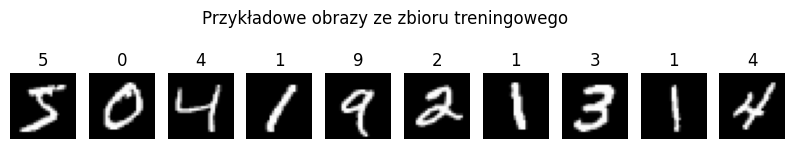

In [2]:

# Wczytujemy przykładowy zbiór MNIST (obrazy cyfr 28x28, 10 klas)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizacja do [0,1]
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Podział na train/val/test
val_size = 5000
x_val = x_train[-val_size:]
y_val = y_train[-val_size:]
x_train = x_train[:-val_size]
y_train = y_train[:-val_size]

# Prosta eksploracja danych
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i].squeeze(), cmap="gray")
    plt.title(str(y_train[i]))
    plt.axis("off")
plt.suptitle("Przykładowe obrazy ze zbioru treningowego")
plt.show()


## 2. Budowa modelu CNN

In [3]:

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Trening i zapis wag

In [4]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=7,
    batch_size=128,
    validation_data=(x_val, y_val)
)

# Zapis wyuczonych wag modelu
model.save('mnist_cnn_model.h5')


Epoch 1/7
430/430 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8382 - loss: 0.5563 - val_accuracy: 0.9810 - val_loss: 0.0667
Epoch 2/7
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9748 - loss: 0.0803 - val_accuracy: 0.9854 - val_loss: 0.0511
Epoch 3/7
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9824 - loss: 0.0564 - val_accuracy: 0.9902 - val_loss: 0.0390
Epoch 4/7
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9872 - loss: 0.0425 - val_accuracy: 0.9896 - val_loss: 0.0365
Epoch 5/7
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9881 - loss: 0.0370 - val_accuracy: 0.9902 - val_loss: 0.0381
Epoch 6/7
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9893 - loss: 0.0328 - val_accuracy: 0.9924 - val_loss: 0.0316
Epoch 7/7
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9914 - val_loss: 0.0331


## 4. Ewaluacja i wizualizacja efektów klasyfikacji

Test accuracy: 0.9890
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step


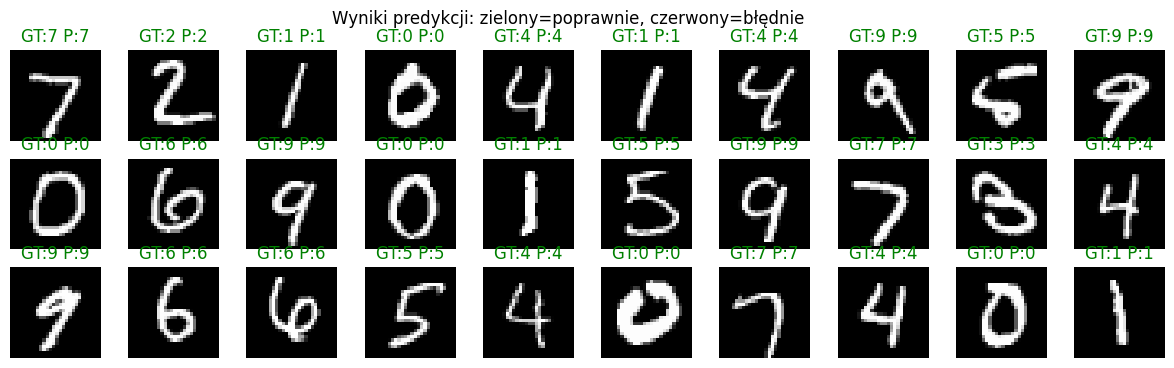

In [6]:

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Wizualizacja wyników na fragmencie testowym
y_pred = np.argmax(model.predict(x_test[:30]), axis=1)

plt.figure(figsize=(15, 4))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    color = "green" if y_pred[i] == y_test[i] else "red"
    plt.title(f"GT:{y_test[i]} P:{y_pred[i]}", color=color)
    plt.axis("off")
plt.suptitle("Wyniki predykcji: zielony=poprawnie, czerwony=błędnie")
plt.show()


## 5. Predykcja na nieznanych obrazach

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


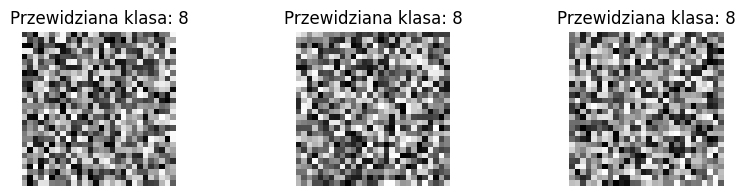

In [8]:

# Przygotuj własny obraz (28x28, grayscale), tu demo na szumie
unknown_imgs = np.random.rand(3, 28, 28, 1)
unknown_preds = np.argmax(model.predict(unknown_imgs), axis=1)

plt.figure(figsize=(10, 2))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(unknown_imgs[i].squeeze(), cmap="gray")
    plt.title(f"Przewidziana klasa: {unknown_preds[i]}")
    plt.axis("off")
# plt.suptitle("Predykcja na nieznanych obrazach (przykład/demo)")
plt.show()


## 6. Metryki: accuracy, confusion matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy (test): 0.9890


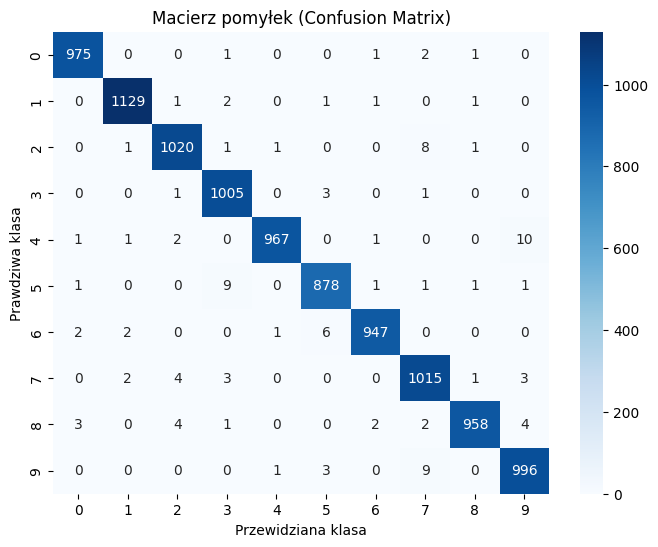

In [9]:

y_test_pred = np.argmax(model.predict(x_test), axis=1)
acc = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)
print(f"Accuracy (test): {acc:.4f}")

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Przewidziana klasa")
plt.ylabel("Prawdziwa klasa")
plt.title("Macierz pomyłek (Confusion Matrix)")
plt.show()


## 7. Wizualizacja feature maps (aktywacji) po pierwszej Conv2D

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


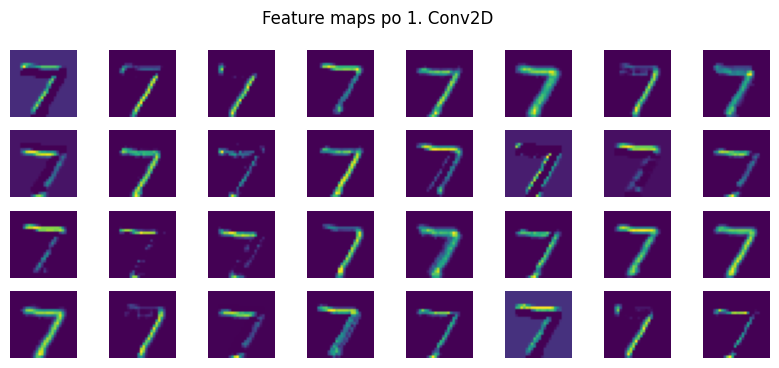

In [13]:
from tensorflow.keras.layers import Input
# Build the model explicitly by calling it with an example input shape
model(x_test[:1])

# Create a model that maps the input to the output of the first layer (Conv2D)
input_layer = Input(shape=model.input_shape[1:])
output_layer = model.layers[0](input_layer)
activation_model = models.Model(inputs=input_layer, outputs=output_layer)

activations = activation_model.predict(x_test[:1])  # pierwszy obraz testowy

plt.figure(figsize=(10, 4))
for i in range(activations.shape[-1]):
    plt.subplot(4, 8, i+1)
    plt.imshow(activations[0, :, :, i], cmap="viridis")
    plt.axis("off")
plt.suptitle("Feature maps po 1. Conv2D")
plt.show()